In [277]:
import pandas as pd
from bs4 import BeautifulSoup as bs
from selenium import webdriver
import mplfinance as mpf
import time
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import sys
import pymysql as mysql
from tqdm.notebook import tqdm
from sklearn.preprocessing import MinMaxScaler
import os
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense , Embedding
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

In [37]:
page=1

# 삼성전자 005930
code='005930'
url='https://finance.naver.com/item/sise_day.nhn?code='+ code + '&page='

driver=webdriver.Chrome('c:/pydata/chromedriver.exe')
driver.get(url+str(page))
html = bs(driver.page_source, 'html.parser')
endPage=html.find('td', class_="pgRR").find('a')['href'].split('=')[-1]

nav_finance=[]

for page in range(1, int(endPage)+1):
    driver.get(url+str(page))
    html = bs(driver.page_source, 'html.parser')
    soup_tr=html.find_all('tr')
    for i in range(2, 15):
        day_data=[]
        soup_td=soup_tr[i].find_all('td')
        if len(soup_td) < 7 :
            continue
        else:
            for td_txt in soup_td:
                if td_txt.text == u'\xa0':
                    continue
                else:
                    day_data.append(td_txt.text.replace('.', '-').replace('\n','').replace('\t', '').replace(',', ''))
                    # day_data.append(re('[가-힣0-9a-zA-Z]+',td_txt.text))

        nav_finance.append(day_data)

driver.close()

df=pd.DataFrame(nav_finance, columns=['날짜','종가',"전일비",'시가','고가','저가','거래량'])
# print(df.info())
df=df.dropna()
# df['날짜']=pd.to_datetime(df['날짜'])
df['날짜'] = [ pd.to_datetime(df.iloc[date, 0]).strftime('%Y%m%d') for date in range(len(df))]
df = df.sort_values(by='날짜')

# 파일 저장 코드
#today = datetime.today().strftime('%Y_%m_%d')
# df.to_csv(f'./삼성전자_{today}.csv', index=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17516\2962392228.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('c:/pydata/chromedriver.exe')


In [40]:
df['날짜'] = [ int (pd.to_datetime(df.iloc[date, 0]).strftime('%Y%m%d')) for date in range(len(df))]
df

,날짜,종가,전일비,시가,고가,저가,거래량
6599,19960625,67500,0,66500,68300,65600,112960
6598,19960626,67700,200,67600,67900,66000,136630
6597,19960627,66900,800,67500,67700,66700,155450
6596,19960628,68100,1200,67300,68500,67200,138430
6595,19960629,68500,400,68100,69100,67100,96710
...,...,...,...,...,...,...,...
4,20221005,56000,800,56900,57200,55400,22458970
3,20221006,56300,300,56700,57300,56300,14944446
2,20221007,56200,100,55900,56900,55200,16886813
1,20221011,55400,800,54400,55700,54000,21437877


In [39]:
df['날짜']

6599    19960625
6598    19960626
6597    19960627
6596    19960628
6595    19960629
          ...   
4       20221005
3       20221006
2       20221007
1       20221011
0       20221012
Name: 날짜, Length: 6600, dtype: object

In [41]:
connect = mysql.connect(host='localhost', port=3306 ,db='test',
                        user='root', password='g901558', autocommit=True)
cursor = connect.cursor()
cnt = 0
cnt_not = 0
save_list = []
# 업데이트 되도록 개별로 커밋
sql = "insert into samsung values(%s, %s, %s, %s, %s, %s, %s)"
for i in tqdm(range(len(df))) :
    try :
        cursor.execute(sql, (df.iloc[i, 0], df.iloc[i, 1], df.iloc[i, 2], df.iloc[i, 3], 
                        df.iloc[i, 4], df.iloc[i, 5], df.iloc[i, 6]))
        cnt += 1
        save_list.append(df.iloc[i, 0])
    except :
        cnt_not += 1
        pass
print('DB 저장완료')
print('신규 저장 데이터 : ', cnt, '기존 데이터 : ', cnt_not)
print('저장된 날짜 리스트 :', save_list)

  0%|          | 0/6600 [00:00<?, ?it/s]

DB 저장완료
신규 저장 데이터 :  6600 기존 데이터 :  0
저장된 날짜 리스트 : [19960625, 19960626, 19960627, 19960628, 19960629, 19960701, 19960702, 19960703, 19960704, 19960705, 19960706, 19960708, 19960709, 19960710, 19960711, 19960712, 19960713, 19960715, 19960716, 19960718, 19960719, 19960720, 19960722, 19960723, 19960724, 19960725, 19960726, 19960727, 19960729, 19960730, 19960731, 19960801, 19960802, 19960803, 19960805, 19960806, 19960807, 19960808, 19960809, 19960810, 19960812, 19960813, 19960814, 19960816, 19960817, 19960819, 19960820, 19960821, 19960822, 19960823, 19960824, 19960826, 19960827, 19960828, 19960829, 19960830, 19960831, 19960902, 19960903, 19960904, 19960905, 19960906, 19960907, 19960909, 19960910, 19960911, 19960912, 19960913, 19960914, 19960916, 19960917, 19960918, 19960919, 19960920, 19960921, 19960923, 19960924, 19960925, 19960930, 19961001, 19961002, 19961004, 19961005, 19961007, 19961008, 19961009, 19961010, 19961011, 19961012, 19961014, 19961015, 19961016, 19961017, 19961018, 19961019

In [189]:
# 원하는 기간의 데이터 가져오기
month_want = 12 * 10
want_time = (datetime.today() - relativedelta(months=month_want)).strftime('%Y%m%d')

In [190]:
# 데이터 불러오기

sql = "SELECT * FROM samsung where 날짜>='" + want_time + "'"
cursor.execute(sql)
result = cursor.fetchall()
print(result)

(('20121012', '1296000', '8000', '1305000', '1312000', '1288000', '300039'), ('20121015', '1300000', '4000', '1296000', '1312000', '1287000', '206958'), ('20121016', '1330000', '30000', '1326000', '1331000', '1315000', '213589'), ('20121017', '1336000', '6000', '1342000', '1346000', '1316000', '180461'), ('20121018', '1337000', '1000', '1336000', '1341000', '1328000', '210796'), ('20121019', '1302000', '35000', '1323000', '1325000', '1299000', '279959'), ('20121022', '1315000', '13000', '1277000', '1317000', '1276000', '234884'), ('20121023', '1313000', '2000', '1319000', '1322000', '1302000', '185296'), ('20121024', '1300000', '13000', '1297000', '1309000', '1289000', '269753'), ('20121025', '1322000', '22000', '1296000', '1322000', '1291000', '237942'), ('20121026', '1287000', '35000', '1306000', '1312000', '1287000', '276353'), ('20121029', '1299000', '12000', '1298000', '1299000', '1279000', '229431'), ('20121030', '1298000', '1000', '1299000', '1304000', '1292000', '133300'), ('20

In [191]:
df_db=pd.DataFrame(result, columns=['날짜','종가',"전일비",'시가','고가','저가','거래량'])
df_db

,날짜,종가,전일비,시가,고가,저가,거래량
0,20121012,1296000,8000,1305000,1312000,1288000,300039
1,20121015,1300000,4000,1296000,1312000,1287000,206958
2,20121016,1330000,30000,1326000,1331000,1315000,213589
3,20121017,1336000,6000,1342000,1346000,1316000,180461
4,20121018,1337000,1000,1336000,1341000,1328000,210796
...,...,...,...,...,...,...,...
2454,20221005,56000,800,56900,57200,55400,22458970
2455,20221006,56300,300,56700,57300,56300,14944446
2456,20221007,56200,100,55900,56900,55200,16886813
2457,20221011,55400,800,54400,55700,54000,21437877


In [234]:
df_db.isnull().any()

날짜     False
종가     False
전일비    False
시가     False
고가     False
저가     False
거래량    False
dtype: bool

In [192]:
scaler = MinMaxScaler()
scale_cols = ['전일비','시가','고가','저가','거래량']
df_scaled = scaler.fit_transform(df_db[scale_cols])
df_db[scale_cols] = df_scaled
df_db['종가'] = df_db['종가'] .astype('int')
df_db

,날짜,종가,전일비,시가,고가,저가,거래량
0,20121012,1296000,0.056738,0.453913,0.456189,0.453841,0.003322
1,20121015,1300000,0.028369,0.450783,0.456189,0.453488,0.002292
2,20121016,1330000,0.212766,0.461217,0.462796,0.463354,0.002365
3,20121017,1336000,0.042553,0.466783,0.468011,0.463707,0.001998
4,20121018,1337000,0.007092,0.464696,0.466273,0.467935,0.002334
...,...,...,...,...,...,...,...
2454,20221005,56000,0.005674,0.019791,0.019889,0.019521,0.248698
2455,20221006,56300,0.002128,0.019722,0.019924,0.019838,0.165486
2456,20221007,56200,0.000709,0.019443,0.019784,0.019450,0.186995
2457,20221011,55400,0.005674,0.018922,0.019367,0.019027,0.237391


In [278]:
TEST_SIZE = 200
WINDOW_SIZE = 100
print('TEST_SIZE :', TEST_SIZE, 'WINDOW_SIZE :',WINDOW_SIZE)
train = df_db[:-TEST_SIZE]
test = df_db[-TEST_SIZE:]
test_date = df_db['날짜'][-TEST_SIZE:]

TEST_SIZE : 200 WINDOW_SIZE : 100


In [207]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [208]:
['종가','전일비','시가','고가','저가','거래량']

['종가', '전일비', '시가', '고가', '저가', '거래량']

In [209]:
df_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459 entries, 0 to 2458
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      2459 non-null   object 
 1   종가      2459 non-null   int32  
 2   전일비     2459 non-null   float64
 3   시가      2459 non-null   float64
 4   고가      2459 non-null   float64
 5   저가      2459 non-null   float64
 6   거래량     2459 non-null   float64
dtypes: float64(5), int32(1), object(1)
memory usage: 125.0+ KB


In [216]:
from sklearn.model_selection import train_test_split
import numpy as np
feature_cols = ['전일비','시가','고가','저가','거래량']
label_cols = ['종가']
train_feature = train[feature_cols]
train_label = train[label_cols]

X_train, y_train = make_dataset(train_feature, train_label, WINDOW_SIZE)

X_train.shape, y_train.shape

((2159, 100, 5), (2159, 1))

In [218]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((200, 5), (200, 1))

In [219]:
test_feature, test_label = make_dataset(test_feature, test_label, WINDOW_SIZE)
test_feature.shape, test_label.shape

((100, 100, 5), (100, 1))

In [220]:
train_feature.shape

(2259, 5)

In [274]:
model = Sequential([
     LSTM(64, 
          input_shape=(100, 5), 
          activation='relu', 
          return_sequences=False),
     Dense(1)])
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 64)                17920     
                                                                 
 dense_47 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17,985
Trainable params: 17,985
Non-trainable params: 0
_________________________________________________________________


In [275]:
model.compile('adam', 'mean_squared_error')
model_path = 'best-samsung-stock-lstm.h5'
mc = ModelCheckpoint(model_path, verbose=1, best_save_only = True)
es = EarlyStopping(patience=5)
history = model.fit(X_train, y_train, 
                                    epochs=2000, 
                                    batch_size=16,
                                    validation_split = 0.2, 
                                    callbacks=[mc, es])

Epoch 1/2000
107/108 [============================>.] - ETA: 0s - loss: 2174717788160.0000
Epoch 1: saving model to best-naver-movie-lstm.h5
108/108 [==============================] - 6s 38ms/step - loss: 2167943462912.0000 - val_loss: 4958623232.0000
Epoch 2/2000
107/108 [============================>.] - ETA: 0s - loss: 2078841503744.0000
Epoch 2: saving model to best-naver-movie-lstm.h5
108/108 [==============================] - 4s 35ms/step - loss: 2081259520000.0000 - val_loss: 4958614016.0000
Epoch 3/2000
107/108 [============================>.] - ETA: 0s - loss: 2322908053504.0000
Epoch 3: saving model to best-naver-movie-lstm.h5
108/108 [==============================] - 4s 35ms/step - loss: 2317493993472.0000 - val_loss: 4958607360.0000
Epoch 4/2000
107/108 [============================>.] - ETA: 0s - loss: 2090476109824.0000
Epoch 4: saving model to best-naver-movie-lstm.h5
108/108 [==============================] - 4s 34ms/step - loss: 2083709779968.0000 - val_loss: 49585909

In [282]:
best_model = load_model(model_path)
best_model.evaluate(test_feature, test_label)

4/4 [==============================] - 0s 12ms/step - loss: nan


nan

4/4 [==============================] - 0s 11ms/step


ConversionError: Failed to convert value(s) to axis units: 2259    20211217
2260    20211220
2261    20211221
2262    20211222
2263    20211223
          ...   
2454    20221005
2455    20221006
2456    20221007
2457    20221011
2458    20221012
Name: 날짜, Length: 200, dtype: object

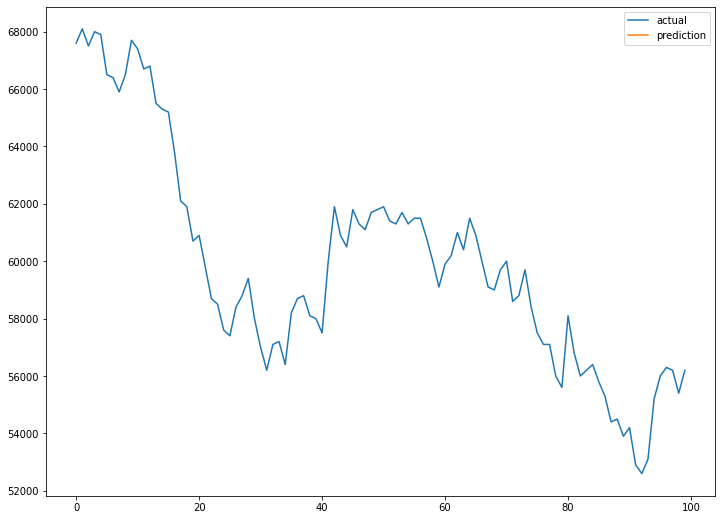

In [281]:
pred = best_model.predict(test_feature)
pred.shape
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.xticks(test_date)
plt.show()

In [286]:
from sklearn.model_selection import train_test_split
import numpy as np
feature_cols = ['전일비','시가','고가','저가','거래량']
label_cols = ['종가']
X_train = train[feature_cols]
y_train = train[label_cols]

In [287]:
X_test = test[feature_cols]
y_test = test[label_cols]

X_test.shape, test_label.shape

((200, 5), (100, 1))

In [293]:
model = Sequential([
     Embedding(5, 512),
     LSTM(256),
     Dense(1)])
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 512)         2560      
                                                                 
 lstm_46 (LSTM)              (None, 256)               787456    
                                                                 
 dense_55 (Dense)            (None, 1)                 257       
                                                                 
Total params: 790,273
Trainable params: 790,273
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile('adam', 'mean_squared_error')
model_path = 'best-samsung-stock-lstm.h5'
mc = ModelCheckpoint(model_path, verbose=1, best_save_only = True)
es = EarlyStopping(patience=5)
history = model.fit(X_train, y_train, 
                                    epochs=2000, 
                                    batch_size=16,
                                    validation_split = 0.2, 
                                    callbacks=[mc, es])

In [ ]:
best_model = load_model(model_path)
best_model.evaluate(test_feature, test_label)